In [29]:
import numpy as np
from src import model
from scipy import signal
from pydub import AudioSegment
import wave
from scipy.io.wavfile import read

In [4]:
!pip install pydub


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [35]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 952.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached scikit_learn-1.2.2-cp39-cp39-macosx_12_0_arm64.whl (8.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.3 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 1.2 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl

(3, 3)
[[ 1.00000000e+00  6.76368336e-17  1.09642867e-15]
 [ 6.76368336e-17  1.00000000e+00 -2.36283938e-16]
 [ 1.09642867e-15 -2.36283938e-16  1.00000000e+00]]


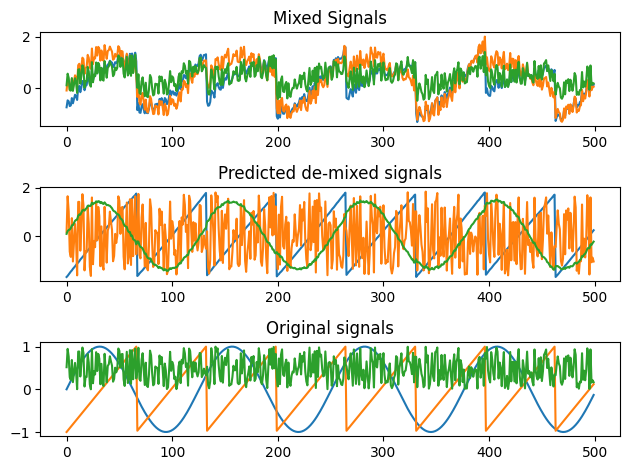

In [3]:
# Set a seed for the random number generator for reproducibility
np.random.seed(23)

# Number of samples
ns = np.linspace(0, 25, 500)

# Source matrix
S = np.array([np.sin(ns * 1),
              signal.sawtooth(ns * 1.9),
              np.random.random(len(ns))]).T

# Mixing matrix
A = np.array([[0.5, 1, 0.2],
              [1, 0.5, 0.4],
              [0.5, 0.8, 1]])

# Mixed signal matrix
X = S.dot(A).T

model = model.IndependentComponentAnalysis(X=X)

model.predict()
model.plot(O=S.T)

In [30]:
path = '/Users/tibortamas/PycharmProjects/ICA/test_audio/'
wave1 = open(path+'OSR_us_000_0017_8k.wav','r')

In [11]:
wave1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=284041, comptype='NONE', compname='not compressed')

In [14]:
signal_1_raw = wave1.readframes(-1)

In [22]:
signal_1 = np.frombuffer(signal_1_raw, dtype=np.int16)

In [23]:
len(signal_1)

0

In [24]:
signal_1_raw

b''

In [28]:
wave1

In [31]:
wave1

<_io.TextIOWrapper name='/Users/tibortamas/PycharmProjects/ICA/test_audio/OSR_us_000_0017_8k.wav' mode='r' encoding='UTF-8'>

In [34]:
np.array(wave1[1],dtype=float)

TypeError: '_io.TextIOWrapper' object is not subscriptable